<a href="https://colab.research.google.com/github/MaxVieiraSantiago/Machine-Learning-Algorithms/blob/master/Linear%20Regression/Regress%C3%A3o_Linear_M%C3%BAltipla_Previs%C3%A3o_de_LR_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelo - Regressao Linear Múltipla**

**Objetivo**

Criar um modelo de regressão linear múltipla para prever o **Limite de Resistência** em Aços.

*Limite de Resistência* - este valor indica a **máxima tensão** suportada pelo material antes de ocorrer a deformação plástica permanente durante o processo de laminação;

### **Bibliotecas Utilizadas**

In [1]:
# Bibliotecas

import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
import statsmodels
from statsmodels.tools.sm_exceptions import ValueWarning
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# Arquivo contendo os resultados dos ensaios

file = '/content/drive/MyDrive/Modelo_LR/modelo_LR.csv'
dados = pd.read_csv( file, sep=';', encoding='utf-8' )

## **1º - Análise Exploratória dos Dados**

### **Visualização dos Dados**

In [3]:
# Visualizando os dados
dados.head()

,CORRIDA,ACO,BITOLA,LRMIN,LRMED,LRMAX,ESMIN,ESMED,ESMAX,CAMIN,...,MO,NI,V,CA,SN,CORRIDA_ENSAIO,CORRIDA.2,TREM,BLOCO,CICLO
0,G244728,1084,9,1115,1115,1115,3528.0,3528.0,3528.0,7150,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,G244731,1084,9,1107,1107,1107,6624.0,6624.0,6624.0,7100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,G293704,PZ81,8,1086,1094,1104,3783.0,3923.0,4179.0,5550,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,G293707,PZ81,8,1135,1145,1155,3826.0,4190.0,4588.0,5822,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,G540601,1084,9,1151,1151,1151,3815.0,3815.0,3815.0,7490,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**DESCRIÇÃO DAS VARIÁVEIS DO MODELO:**

*   **CORRIDA**: número da corrida onde foi realizado o ensaio ( Limite de Resistência );
*   **ACO**: grau do aço produzido na corrida onde foi realizado o ensaio ( Limite de Resistência );
*   **BITOLA**: espessura final desejada do produto laminado, influenciada pelo ajuste dos rolos durante o processo de laminação.
*   **LRMIN**: *Limite de Resistência Mínimo* - representa o **menor valor** encontrado para os ensaios realizados na corrida, este valor indica a máxima tensão suportada pelo material antes de ocorrer a deformação plástica permanente durante o processo de laminação;
*   **LRMED**: *Limite de Resistência Médio* - representa a **média dos valores** para os ensaios realizados na corrida, este valor indica a máxima tensão suportada pelo material antes de ocorrer a deformação plástica permanente durante o processo de laminação, é a variável **DEPENDENTE** ( **Y** );
*   **LRMAX**: *Limite de Resistência Máximo* - representa o **maior valor** encontrado para os ensaios realizados na corrida, este valor indica a máxima tensão suportada pelo material antes de ocorrer a deformação plástica permanente durante o processo de laminação;
*   **ESMIN**: *Estricção Mínima* - representa o **menor valor** encontrado para os ensaios realizados na corrida, refere-se à redução localizada da seção transversal do material, resultando em um aumento da sua extensão longitudinal, influenciando propriedades mecânicas e a geometria do produto final;
*   **ESMED**: *Estricção Média* - representa a **média dos valores** para os ensaios realizados na corrida, refere-se à redução localizada da seção transversal do material, resultando em um aumento da sua extensão longitudinal, influenciando propriedades mecânicas e a geometria do produto final;
*   **ESMAX**: *Estricção Máxima* - representa o **maior valor** encontrado para os ensaios realizados na corrida, refere-se à redução localizada da seção transversal do material, resultando em um aumento da sua extensão longitudinal, influenciando propriedades mecânicas e a geometria do produto final;
*   **CAMIN**: *Carga Mínima* - representa o **menor valor** encontrado para os ensaios realizados na corrida, representa a força máxima aplicada aos rolos durante o processo, indicando a capacidade do material de suportar tensões antes da deformação plástica permanente;
*   **CAMED**: *Carga Média* - representa a **média dos valores** para os ensaios realizados na corrida, representa a força máxima aplicada aos rolos durante o processo, indicando a capacidade do material de suportar tensões antes da deformação plástica permanente;
*   **CAMAX**: *Carga Máxima* - representa o **menor valor** encontrado para os ensaios realizados na corrida, representa a força máxima aplicada aos rolos durante o processo, indicando a capacidade do material de suportar tensões antes da deformação plástica permanente;
*   **TREM**: *Trem de Laminação* - é um conjunto de equipamentos que realiza a deformação plástica do metal, reduzindo sua espessura e melhorando suas propriedades mecânicas, através de uma série de passes sucessivos entre rolos;
*   **CICLO**: *Ciclo de Resfriamento* - refere-se ao controle preciso da taxa e temperatura de resfriamento do metal laminado, influenciando diretamente as propriedades mecânicas e a microestrutura do aço para atender às especificações desejadas de dureza e tenacidade no produto final. Esse processo é crucial para otimizar as características do aço conforme as necessidades de aplicação;
*   **BLOCO**: O *Bloco Acabador* é a última etapa do trem de laminação, responsável por realizar a formação final do produto laminado, ajustando a geometria, dimensões e propriedades superficiais antes da sua saída para o resfriamento, inspeção e processos subsequentes. Esse componente desempenha um papel crucial na obtenção das características finais desejadas do aço.


**ANÁLISE QUÍMICA FINAL - FORNO PANELA**

A análise química de aço final do forno panela refere-se à determinação das composições químicas específicas, como teores de carbono, silício, manganês e outros elementos, para garantir a conformidade com as especificações de qualidade e propriedades desejadas no produto final de aço, sendo o **último resultado obtido** antes da disponibilização do aço líquido para a *Máquina de Lingotamento Contínuo* quando irá se tansformar no produto final da aciaria (**TARUGO**).

**ELEMENTOS QUÍMICOS**:

*   **S**: *Enxofre* - é geralmente mantido em baixos níveis, pois altas concentrações podem causar fragilidade a frio. Seu controle preciso é essencial para garantir propriedades mecânicas adequadas e evitar efeitos negativos, enquanto em aços específicos, como os de usinagem, pequenas quantidades de enxofre podem ser toleradas para melhorar a usinabilidade;
*   **C**: *Carbono* - desempenha um papel crucial na determinação das propriedades mecânicas do material. A quantidade de carbono influencia diretamente a dureza, resistência e a capacidade de endurecimento do aço, sendo ajustada para atender às especificações de diferentes aplicações, resultando em aços com características que variam de suaves e maleáveis a duros e resistentes. O controle preciso do teor de carbono é essencial para alcançar as propriedades desejadas no produto final;
*   **MN**: *Manganês* -  atua como um desoxidante e desulfurante, ajudando a remover impurezas indesejáveis. Além disso, o manganês contribui para o aumento da resistência e tenacidade do aço, auxiliando na formação de uma estrutura mais refinada durante o processo de solidificação, melhorando as propriedades mecânicas do material final. O controle preciso do teor de manganês é essencial para otimizar essas características conforme as especificações desejadas;
*   **P**: *Fósforo* - é geralmente mantido em baixos níveis, pois concentrações elevadas podem causar fragilidade e reduzir a tenacidade do material. Controlar o teor de fósforo é essencial para garantir as propriedades mecânicas adequadas e a qualidade do aço, evitando efeitos adversos em sua aplicação final;
*   **SI**: *Silício* - é utilizado como desoxidante para remover o oxigênio e outras impurezas do metal fundido. Além disso, contribui para a formação de uma estrutura mais refinada, melhorando a resistência e tenacidade do aço. O controle preciso do teor de silício é crucial para otimizar essas propriedades nas aplicações finais do aço;
*   **AL**: *Alumínio* - é utilizado como um desoxidante eficaz para remover o oxigênio do metal fundido, prevenindo a formação de inclusões indesejáveis. Além disso, o alumínio contribui para melhorar a resistência e a ductilidade do aço, influenciando positivamente suas propriedades mecânicas. O controle preciso do teor de alumínio é essencial para garantir a qualidade do aço final;
*   **N**: *Nitrogênio* - é geralmente mantido em baixos níveis, pois altas concentrações podem causar fragilidade. No entanto, em quantidades controladas, o nitrogênio pode contribuir para a resistência e a dureza do aço, sendo utilizado estrategicamente para melhorar as propriedades mecânicas do material final. O controle preciso do teor de nitrogênio é essencial para evitar efeitos adversos na qualidade do aço;
*   **B**: *Boro* - é adicionado em pequenas quantidades para melhorar a temperabilidade do aço, ou seja, a capacidade de endurecimento por tratamento térmico. O boro ajuda a alcançar maior dureza nas regiões tratadas termicamente, sendo utilizado em ligas específicas para aplicações que requerem alta resistência e tenacidade em áreas localizadas do material. O controle preciso do teor de boro é essencial para garantir a eficácia desse processo;
*   **NB**: *Nióbio* - é utilizado como elemento de liga para melhorar a resistência, a tenacidade e a soldabilidade do aço. Sua adição auxilia na formação de carbonetos de nióbio, que fortalecem a estrutura do aço. O nióbio é frequentemente utilizado em aços de alta resistência para aplicações em que são necessárias propriedades mecânicas superiores;
*   **TI**: *Titânio* - é utilizado como elemento de liga para formar nitretos de titânio, melhorando a resistência ao desgaste e a tenacidade do aço. Sua presença contribui para aprimorar as propriedades mecânicas e a durabilidade em aplicações que exigem alta resistência e resistência à abrasão. O titânio é empregado estrategicamente para otimizar o desempenho do aço em condições específicas de uso;
*   **CU**: *Cobre* - é geralmente mantido em baixos teores. Em quantidades controladas, o cobre pode contribuir para melhorar a resistência à corrosão do aço, sendo utilizado em ligas específicas para aplicações que exigem maior durabilidade em ambientes corrosivos. O controle preciso do teor de cobre é essencial para evitar efeitos adversos nas propriedades mecânicas do aço;
*   **CR**: *Cromo* - é utilizado como elemento de liga para melhorar a resistência à corrosão e a dureza do aço. Sua presença contribui para a formação de óxidos protetores na superfície do aço, conferindo-lhe uma maior capacidade de resistir à corrosão atmosférica e ambientes agressivos. O cromo é frequentemente utilizado em aços inoxidáveis e ligas resistentes à corrosão;
*   **MO**: *Molibidênio* - é utilizado como elemento de liga para aumentar a resistência à tração, a dureza e a resistência à corrosão do aço. Sua presença é especialmente benéfica em aplicações de alta temperatura, como em ligas utilizadas em equipamentos industriais e estruturas sujeitas a condições severas de serviço. O molibdênio contribui significativamente para melhorar as propriedades mecânicas e a durabilidade do aço;
*   **NI**: *Níquel* - é utilizado como elemento de liga para melhorar a resistência à corrosão, a tenacidade e a capacidade de manter propriedades mecânicas em amplas faixas de temperatura. O níquel é frequentemente empregado em aços inoxidáveis e ligas resistentes a ambientes corrosivos, contribuindo para aprimorar as características de desempenho em diversas aplicações. Sua adição proporciona benefícios significativos em termos de durabilidade e resistência do aço;
*   **V**: *Vanádio* - é utilizado como elemento de liga para melhorar a resistência, a tenacidade e a capacidade de manter a dureza após tratamento térmico. Sua presença contribui para a formação de carbonetos de vanádio, fortalecendo a estrutura do aço e aumentando sua resistência ao desgaste. O vanádio é frequentemente empregado em aços para ferramentas e em ligas destinadas a aplicações que demandam alta resistência mecânica;
*   **CA**: *Cálcio* -  é utilizado como um agente de dessulfuração para remover o enxofre, melhorando a qualidade do aço. Sua adição contribui para a formação de inclusões de sulfeto de cálcio, facilitando a remoção de impurezas e, assim, aprimorando as propriedades mecânicas e a usinabilidade do aço final. O cálcio é utilizado estrategicamente para otimizar a limpeza do aço durante o processo de produção.

In [4]:
# Descrição dos campos disponíveis
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30556 entries, 0 to 30555
Data columns (total 36 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CORRIDA         30556 non-null  object 
 1   ACO             30556 non-null  object 
 2   BITOLA          30556 non-null  object 
 3   LRMIN           30556 non-null  int64  
 4   LRMED           30556 non-null  int64  
 5   LRMAX           30556 non-null  int64  
 6   ESMIN           30464 non-null  float64
 7   ESMED           30464 non-null  float64
 8   ESMAX           30464 non-null  float64
 9   CAMIN           30556 non-null  int64  
 10  CAMED           30556 non-null  int64  
 11  CAMAX           30556 non-null  int64  
 12  CORRIDA.1       30120 non-null  float64
 13  ACO.1           30120 non-null  object 
 14  S               30120 non-null  object 
 15  C               30120 non-null  object 
 16  MN              30120 non-null  object 
 17  P               30120 non-null 

# **2º - Pré-Processamento dos Dados**

#### **Eliminando Campos Desnecessários**

In [5]:
# Campos Desnecessários ( não são relevantes para o modelo ) - Eliminar
dados = dados.drop(columns = ['CORRIDA.1', 'ACO.1', 'SN', 'CORRIDA_ENSAIO', 'CORRIDA.2'], axis=1)

#### **Valores Faltantes (Missing Values)**

In [6]:
# Verificação de Nulos
dados.isnull().sum()

CORRIDA      0
ACO          0
BITOLA       0
LRMIN        0
LRMED        0
LRMAX        0
ESMIN       92
ESMED       92
ESMAX       92
CAMIN        0
CAMED        0
CAMAX        0
S          436
C          436
MN         436
P          436
SI         436
AL         436
N          436
B          436
NB         436
TI         436
CU         436
CR         436
MO         436
NI         436
V          455
CA         860
TREM       436
BLOCO      436
CICLO      436
dtype: int64

In [7]:
# Elimnar Valores Missing (nulos)
dados = dados.dropna()

#### **Análise da Duplicidade de Informações**

In [8]:
# Verificando valores duplicados
dados.duplicated()

97       False
98       False
99        True
100       True
101      False
         ...  
30550    False
30551    False
30552     True
30553    False
30554     True
Length: 29606, dtype: bool

In [9]:
# Removendo registros duplicados
dados.drop_duplicates(inplace=True)
dados.duplicated()

97       False
98       False
101      False
103      False
104      False
         ...  
30547    False
30549    False
30550    False
30551    False
30553    False
Length: 15927, dtype: bool

#### **Transformação de Dados**

In [10]:
# Análise dos tipos de atributos
dados.dtypes

CORRIDA     object
ACO         object
BITOLA      object
LRMIN        int64
LRMED        int64
LRMAX        int64
ESMIN      float64
ESMED      float64
ESMAX      float64
CAMIN        int64
CAMED        int64
CAMAX        int64
S           object
C           object
MN          object
P           object
SI          object
AL          object
N           object
B           object
NB          object
TI          object
CU          object
CR          object
MO          object
NI          object
V           object
CA          object
TREM        object
BLOCO       object
CICLO      float64
dtype: object

In [11]:
# Transformação de dados ( object pata float )
dados['BITOLA'] = dados['BITOLA'].str.replace(',','.').astype(float)
dados['S']      = dados['S'].str.replace(',','.').astype(float)
dados['C']      = dados['C'].str.replace(',','.').astype(float)
dados['MN']     = dados['MN'].str.replace(',','.').astype(float)
dados['P']      = dados['P'].str.replace(',','.').astype(float)
dados['SI']     = dados['SI'].str.replace(',','.').astype(float)
dados['AL']     = dados['AL'].str.replace(',','.').astype(float)
dados['N']      = dados['N'].str.replace(',','.').astype(float)
dados['B']      = dados['B'].str.replace(',','.').astype(float)
dados['NB']     = dados['NB'].str.replace(',','.').astype(float)
dados['TI']     = dados['TI'].str.replace(',','.').astype(float)
dados['CU']     = dados['CU'].str.replace(',','.').astype(float)
dados['CR']     = dados['CR'].str.replace(',','.').astype(float)
dados['MO']     = dados['MO'].str.replace(',','.').astype(float)
dados['NI']     = dados['NI'].str.replace(',','.').astype(float)
dados['V']      = dados['V'].str.replace(',','.').astype(float)
dados['CA']     = dados['CA'].str.replace(',','.').astype(float)

dados.dtypes

CORRIDA     object
ACO         object
BITOLA     float64
LRMIN        int64
LRMED        int64
LRMAX        int64
ESMIN      float64
ESMED      float64
ESMAX      float64
CAMIN        int64
CAMED        int64
CAMAX        int64
S          float64
C          float64
MN         float64
P          float64
SI         float64
AL         float64
N          float64
B          float64
NB         float64
TI         float64
CU         float64
CR         float64
MO         float64
NI         float64
V          float64
CA         float64
TREM        object
BLOCO       object
CICLO      float64
dtype: object

#### **Seleção de Aços (ATC - MTC - BTC - ML)**

In [12]:
# Selecionar Tipo - ATC
dados = dados.loc[(dados['ACO'] == '1070') |
                  (dados['ACO'] == '1080') |
                  (dados['ACO'] == '1084') |
                  (dados['ACO'] == 'BC68') |
                  (dados['ACO'] == 'BW80')]

#### **Estatística Descritiva**

In [13]:
# Avaliando os Dados
dados.describe()

,BITOLA,LRMIN,LRMED,LRMAX,ESMIN,ESMED,ESMAX,CAMIN,CAMED,CAMAX,...,B,NB,TI,CU,CR,MO,NI,V,CA,CICLO
count,4477.000000,4477.000000,4477.000000,4477.000000,4477.000000,4477.000000,4477.000000,4477.000000,4477.000000,4477.000000,...,4477.000000,4477.000000,4477.000000,4477.000000,4477.000000,4477.000000,4477.000000,4477.000000,4477.000000,4477.000000
mean,6.153686,1099.626312,1106.071030,1112.602636,3199.060085,3793.616484,4108.931651,3532.703149,3558.559526,3583.945052,...,0.000194,0.001458,0.000995,0.010036,0.034854,0.003137,0.009988,0.002872,0.000334,19.767925
std,1.407534,59.988530,58.079257,57.595005,1778.875313,1176.984374,1155.292450,2046.677541,2050.666059,2054.565112,...,0.000046,0.000450,0.000200,0.004690,0.048529,0.001854,0.003999,0.000382,0.000272,4.189967
min,4.750000,965.000000,971.000000,975.000000,36.000000,36.000000,36.000000,1815.000000,1815.000000,1815.000000,...,0.000100,0.000300,0.000100,0.005100,0.011800,0.000300,0.004700,0.001400,0.000100,1.000000
25%,5.500000,1040.000000,1045.000000,1055.000000,696.000000,3571.000000,3826.000000,2532.000000,2550.000000,2582.000000,...,0.000200,0.001300,0.000900,0.007200,0.019600,0.001900,0.007000,0.002600,0.000200,20.000000
50%,5.500000,1118.000000,1123.000000,1127.000000,3866.000000,3935.000000,4191.000000,2720.000000,2744.000000,2765.000000,...,0.000200,0.001500,0.000900,0.008200,0.023600,0.003000,0.009600,0.002800,0.000300,20.000000
75%,5.500000,1144.000000,1148.000000,1154.000000,4207.000000,4284.000000,4541.000000,2870.000000,2917.000000,2958.000000,...,0.000200,0.001700,0.001000,0.011300,0.029200,0.003600,0.011300,0.003100,0.000400,20.000000
max,14.300000,1249.000000,1249.000000,1257.000000,8286.000000,8322.000000,8343.000000,19800.000000,19800.000000,19800.000000,...,0.000500,0.003400,0.002600,0.041000,0.274900,0.018400,0.038700,0.004400,0.004000,31.000000


In [14]:
# Identificando Registros por Aço
dados['ACO'].value_counts()

1084    2320
1070    1441
BW80     339
BC68     271
1080     106
Name: ACO, dtype: int64

#### **Análise de Outliers**

In [15]:
# LR - Limite de Resistência
boxplot = px.box(dados, y='LRMED')
boxplot.show()

In [16]:
# Estricção
boxplot = px.box(dados, y='ESMED')
boxplot.show()

In [17]:
# Apagar a linha com valor outlier (Estricção )
remover = dados.loc[ (dados['ESMED'] > 4700) | (dados['ESMED'] < 3800) ]
dados.drop( remover.index, inplace = True )

# Estricção
boxplot = px.box(dados, y='ESMED')
boxplot.show()

In [18]:
# Carga LR - Média
boxplot = px.box(dados, y='CAMED')
boxplot.show()

In [19]:
# Apagar a linha com valor outlier (Carga LE )
remover = dados.loc[ (dados['CAMED'] > 2857)]
dados.drop( remover.index, inplace = True )

# Carga LR
boxplot = px.box(dados, y='CAMED')
boxplot.show()

In [20]:
# S
boxplot = px.box(dados, y='S')
boxplot.show()

In [21]:
# C
boxplot = px.box(dados, y='C')
boxplot.show()

In [22]:
# Mn
boxplot = px.box(dados, y='MN')
boxplot.show()

In [23]:
# Cr - Cromo
boxplot = px.box(dados, y='CR')
boxplot.show()

## **Visualização dos Dados**

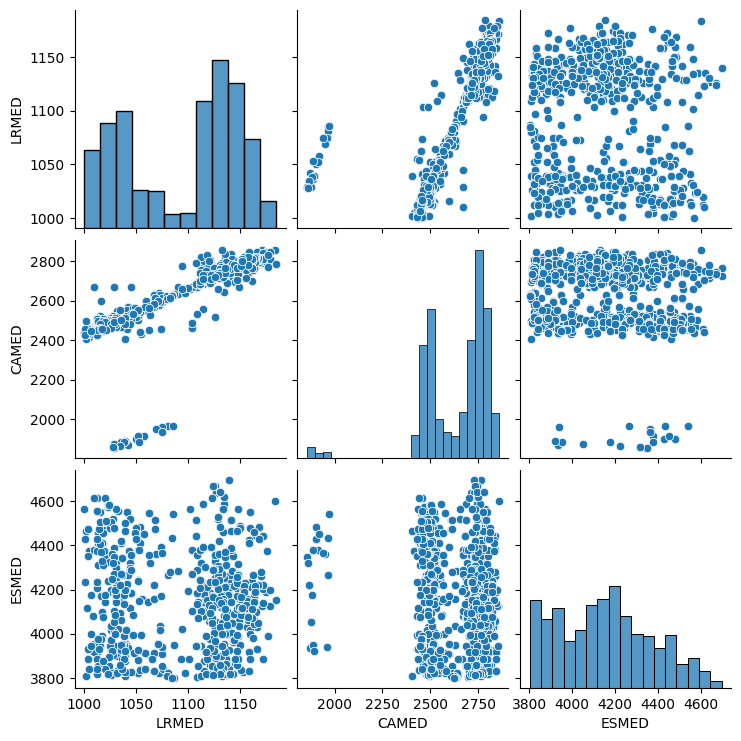

In [28]:
# Gráficos Ensaios em Função do LR
# X_grafico = ['CAMED', 'ESMED', 'S', 'C', 'MN', 'P', 'SI', 'AL', 'N', 'B', 'NB', 'TI', 'CU', 'CR', 'MO', 'NI', 'V', 'CA', 'CICLO']
X_grafico = ['LRMED', 'CAMED', 'ESMED']
dados_grafico = dados[X_grafico]

sns.pairplot(dados_grafico)

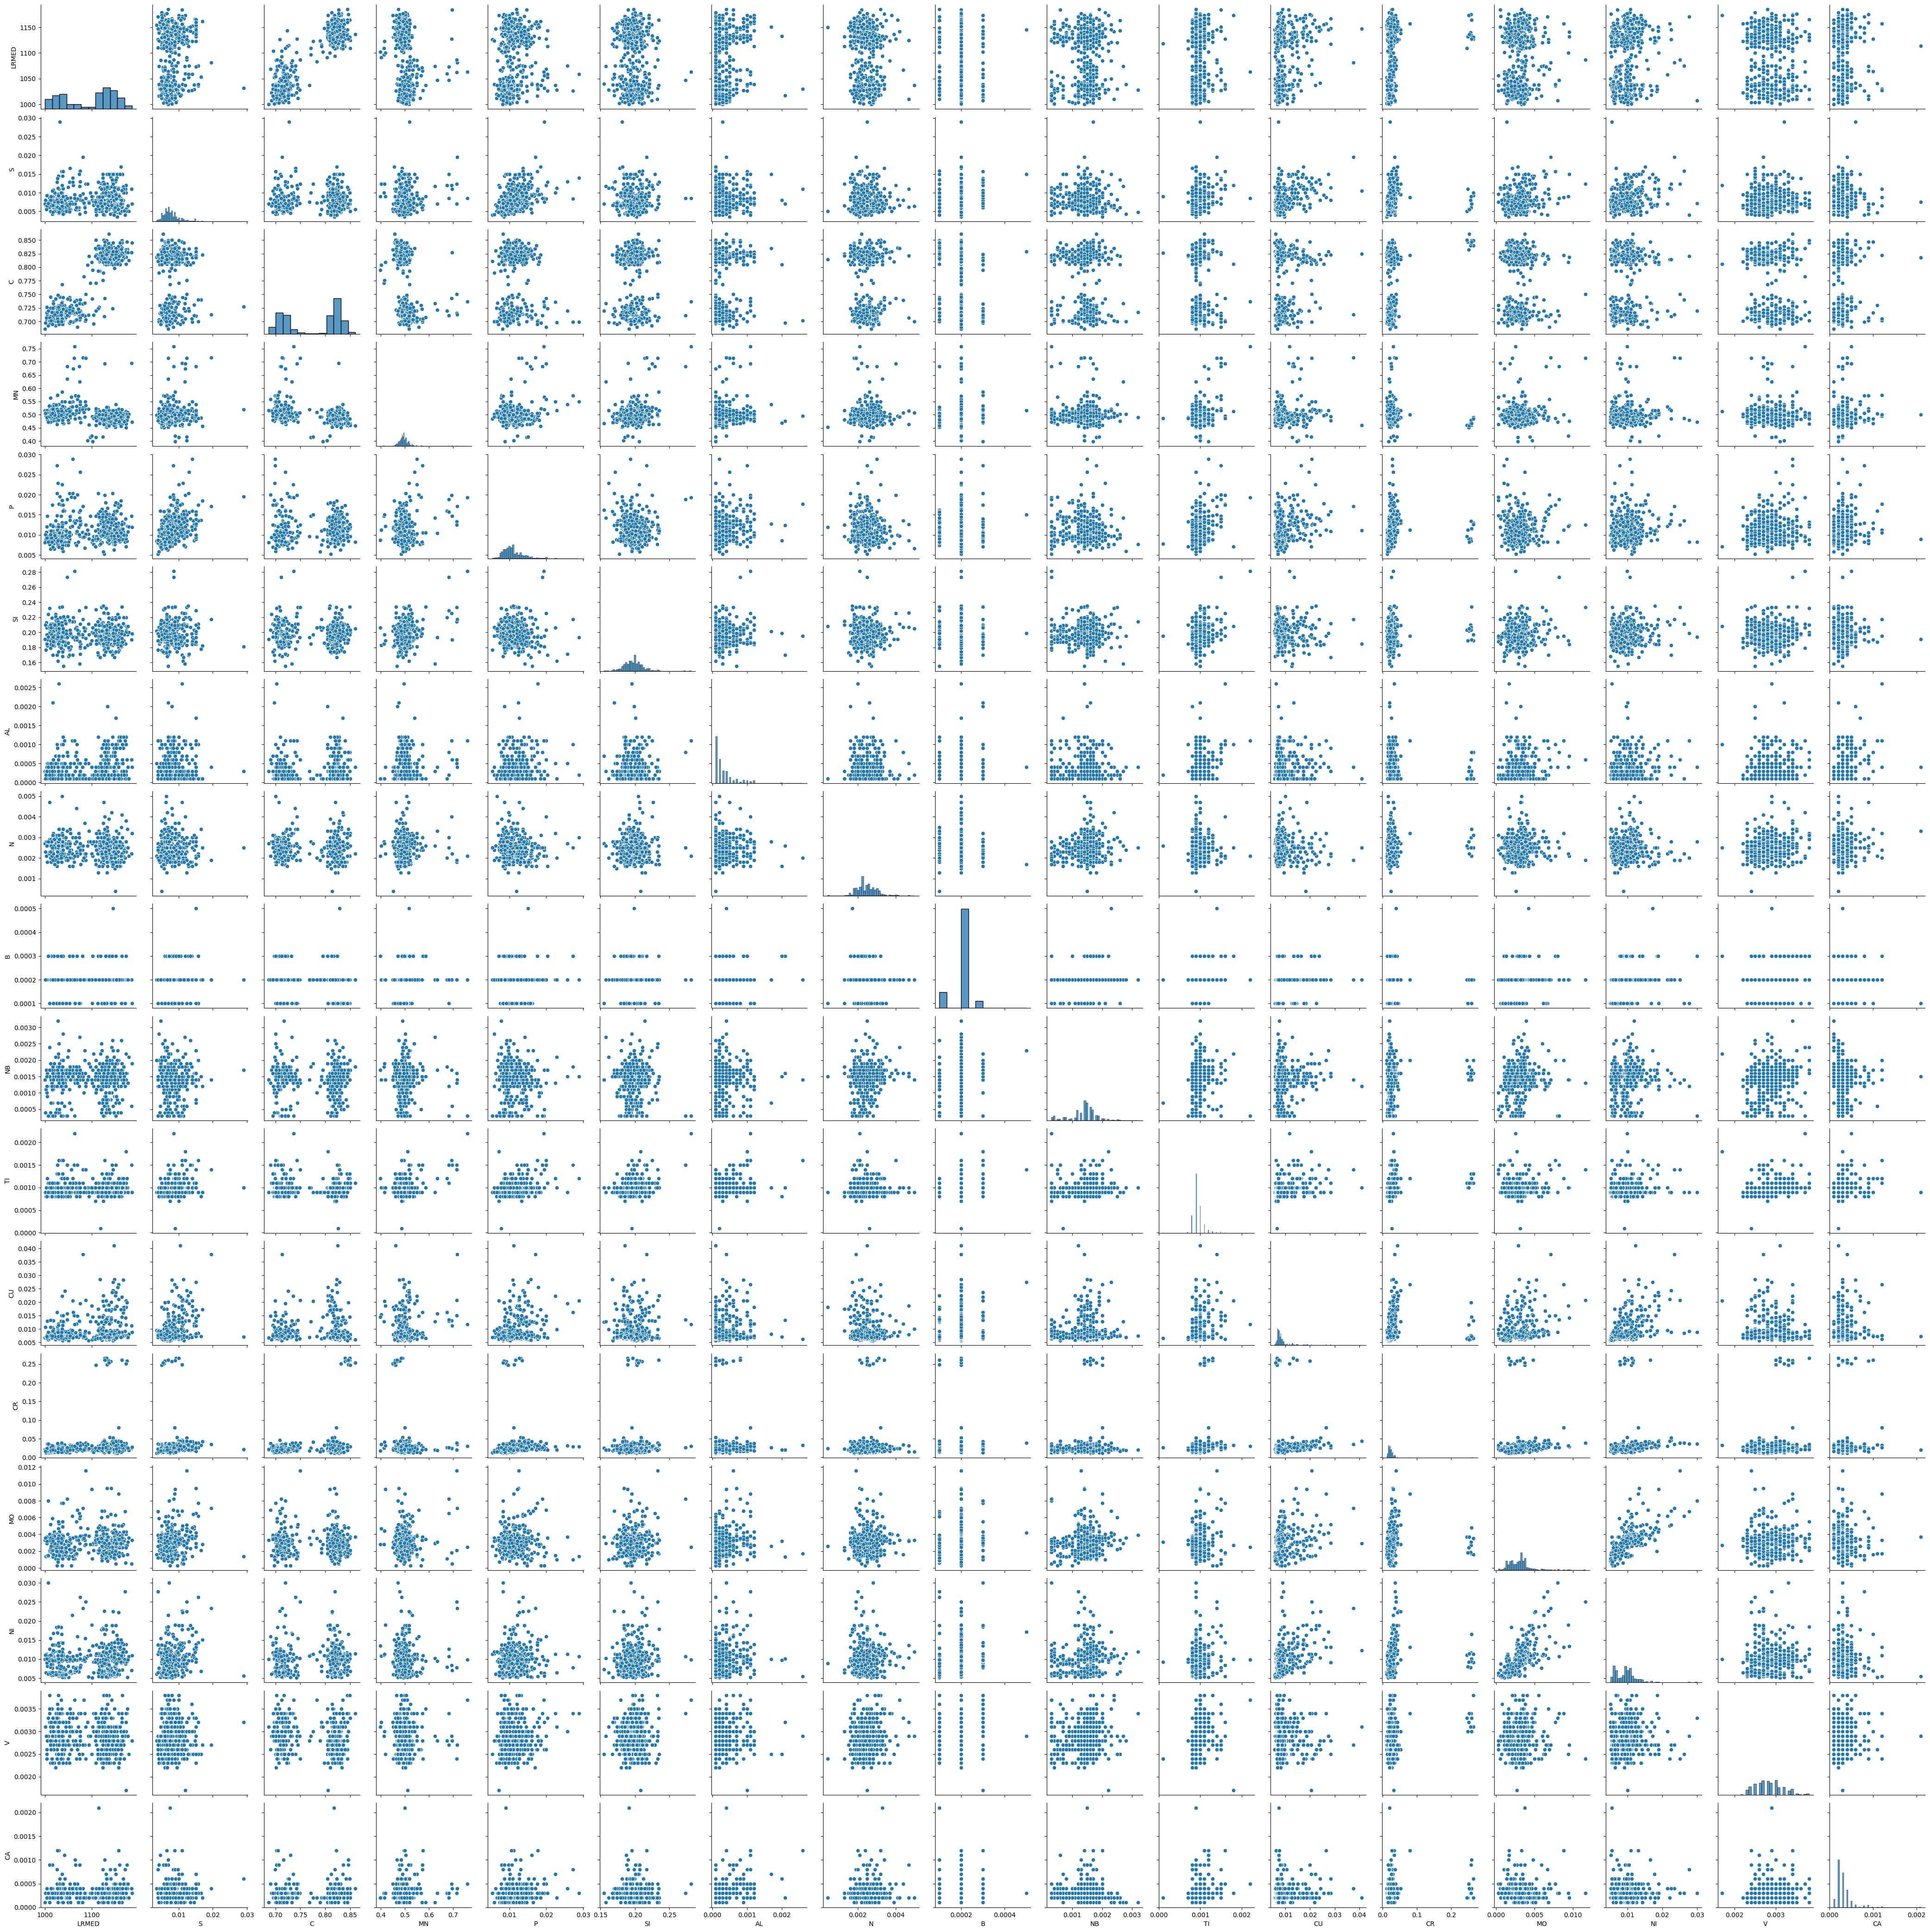

In [29]:
# Gráficos Análise Química em Função do LR
X_grafico = ['LRMED', 'S', 'C', 'MN', 'P', 'SI', 'AL', 'N', 'B', 'NB', 'TI', 'CU', 'CR', 'MO', 'NI', 'V', 'CA']
dados_grafico = dados[X_grafico]

sns.pairplot(dados_grafico)

# **3º - Definição dos Modelos**

In [30]:
# Criação do modelo 1
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

# Treinamento do Modelo
modelo1 = smf.ols( 'LRMED ~ CAMED + ESMED + S + C + MN + P + SI + AL + N + B + NB + TI + CU + CR + MO + NI + V + CA + CICLO', data = dados).fit()

In [31]:
# Avaliação dos Resíduos
residuos = modelo1.resid
residuos

124     -19.379407
125     -19.379407
128     -19.379407
585      11.693922
586       9.224014
           ...    
30405     1.797472
30406     1.797472
30547    -5.816270
30549     3.306915
30550   -22.913724
Length: 1829, dtype: float64

## **Teste de Normalidade dos Resíduos**

Ho = Distribuição Normal: p > 0.05

Ha = Distribuição != Normal: p <= 0.05

In [32]:
import scipy.stats as stats

In [34]:
estatistica, p = stats.shapiro( residuos )
print("Estatística de teste: {:.2f}%".format(estatistica * 100))
print('p-valor: {}'.format(p))

Estatística de teste: 95.71%
p-valor: 8.559505590930552e-23


In [35]:
import matplotlib.pyplot as plt

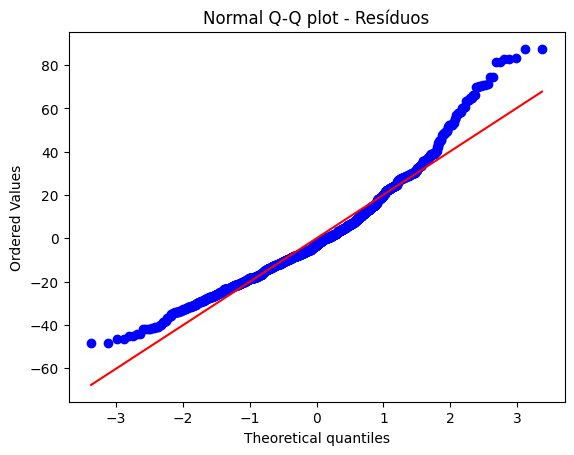

In [36]:
stats.probplot(residuos, dist='norm', plot=plt)
plt.title('Normal Q-Q plot - Resíduos')
plt.show()

## **Análise da Homocedasticidade dos Resíduos**

( Resíduos com Variação Constante )

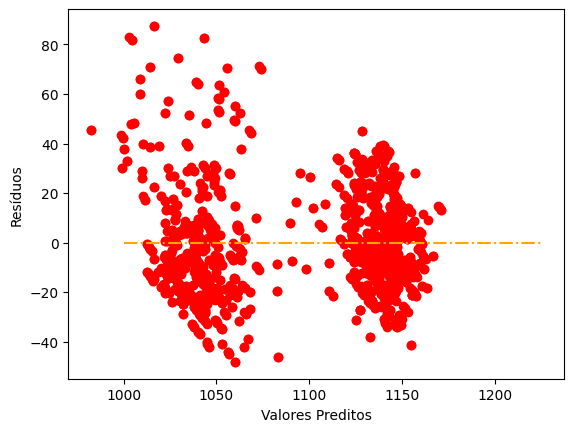

In [37]:
plt.scatter(x=modelo1.predict(), y=residuos, color='red')
plt.hlines(0, xmin=1000, xmax=1225, color='orange', linestyles='dashdot')
plt.ylabel('Resíduos')
plt.xlabel('Valores Preditos')
plt.show()

Teste Breusch-Pagan (Homocedasticidade ou Heterocedasticidade)

Ho = existe Homocedasticidade: p > 0.05

Ha = não existe Homocedasticidade: p <= 0.05

In [38]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [39]:
estatistica, p, f, fp = sms.het_breuschpagan( modelo1.resid, modelo1.model.exog )
print("Estatística do teste: {}%".format(estatistica))
print('p-valor: {}'.format(p))
print('f-valor: {}'.format(f))
print('f_p-valor: {}'.format(fp))

Estatística do teste: 230.42900598833612%
p-valor: 2.767839583450587e-38
f-valor: 13.724299402878826
f_p-valor: 3.6071410730568226e-41


## **Outliers nos Resíduos**

( Entre -3 e 3 )

In [40]:
outliers = modelo1.outlier_test()
print(outliers.max())
print(outliers.min())

student_resid    4.269513
unadj_p          0.998909
bonf(p)          1.000000
dtype: float64
student_resid   -2.345572
unadj_p          0.000021
bonf(p)          0.037688
dtype: float64


## **Independência dos Resíduos (Durbin-Watson)**

A estatística de teste é aproximadamente igual a 2 * (1 - r) onde r é a automcorrelação da amostra dos resíduos. Assim, para r = 0, a estatística de teste é igual a 2, indicando independência dos resíduos (o resultado vai de 0 a 4)

In [41]:
import statsmodels
from statsmodels.tools.sm_exceptions import ValueWarning

In [42]:
estatistica = statsmodels.stats.stattools.durbin_watson(modelo1.resid)
print('Estatística do teste: {}'.format(estatistica))

Estatística do teste: 0.418537685920585


## **Análise da Correlação Linear**

### **Ausência de Multicolinearidade**

Somente entre variáveis independentes

Considera multicolinearidade quando r > 0.9

In [43]:
variaveis = dados[['CAMED', 'ESMED', 'S', 'C',  'MN',  'P', 'SI', 'AL', 'N', 'B', 'NB', 'TI', 'CU', 'CR', 'MO', 'NI', 'V', 'CA', 'CICLO']]
variaveis.head()

,CAMED,ESMED,S,C,MN,P,SI,AL,N,B,NB,TI,CU,CR,MO,NI,V,CA,CICLO
124,2570,3997.0,0.008,0.725,0.512,0.0100,0.188,0.0004,0.0029,0.0002,0.0016,0.0011,0.0241,0.0255,0.0024,0.0103,0.0028,0.0006,20.0
125,2570,3997.0,0.008,0.725,0.512,0.0100,0.188,0.0004,0.0029,0.0002,0.0016,0.0011,0.0241,0.0255,0.0024,0.0103,0.0028,0.0006,20.0
128,2570,3997.0,0.008,0.725,0.512,0.0100,0.188,0.0004,0.0029,0.0002,0.0016,0.0011,0.0241,0.0255,0.0024,0.0103,0.0028,0.0006,20.0
585,2840,4443.0,0.012,0.806,0.512,0.0071,0.208,0.0010,0.0025,0.0003,0.0022,0.0018,0.0205,0.0324,0.0027,0.0100,0.0017,0.0003,12.0
586,2840,4443.0,0.012,0.806,0.512,0.0071,0.208,0.0010,0.0025,0.0003,0.0022,0.0018,0.0205,0.0324,0.0027,0.0100,0.0017,0.0003,31.0


In [47]:
correlacoes = variaveis.corr(method='pearson')
correlacoes

,CAMED,ESMED,S,C,MN,P,SI,AL,N,B,NB,TI,CU,CR,MO,NI,V,CA,CICLO
CAMED,1.000000,-0.123494,0.065572,0.806823,-0.225815,0.013108,0.001268,0.097442,-0.063128,-0.136248,-0.002506,-0.018924,0.116568,0.130290,-0.034508,-0.013510,-0.076155,0.052424,0.123214
ESMED,-0.123494,1.000000,-0.066384,-0.100581,-0.010199,-0.105032,-0.005539,-0.082801,0.021454,0.032661,-0.111119,-0.043114,0.005293,-0.038862,-0.000832,0.057016,-0.034986,-0.027158,0.022992
S,0.065572,-0.066384,1.000000,0.078237,0.113395,0.428123,-0.038221,0.143022,-0.016505,0.166795,-0.066679,0.275575,0.359029,0.060949,0.176923,0.236759,0.075126,0.013460,0.039915
C,0.806823,-0.100581,0.078237,1.000000,-0.337059,0.048273,-0.015477,0.110770,-0.066255,-0.166254,0.004176,-0.003718,0.125748,0.218527,0.006282,0.049442,-0.059981,0.058427,0.158371
MN,-0.225815,-0.010199,0.113395,-0.337059,1.000000,0.200301,0.244644,0.062627,-0.019933,0.068840,-0.033943,0.362668,0.084241,-0.145035,-0.010899,-0.033890,-0.018030,0.076699,-0.172400
P,0.013108,-0.105032,0.428123,0.048273,0.200301,1.000000,-0.128905,0.146390,-0.123989,0.068430,0.039159,0.394641,0.293251,0.074816,-0.009589,0.051471,0.124783,0.121440,0.007110
SI,0.001268,-0.005539,-0.038221,-0.015477,0.244644,-0.128905,1.000000,0.022107,0.067815,-0.073642,-0.054568,0.212821,0.031267,0.057154,0.050026,0.064841,0.120710,0.007965,0.009652
AL,0.097442,-0.082801,0.143022,0.110770,0.062627,0.146390,0.022107,1.000000,-0.039972,0.075088,-0.004068,0.286457,0.130084,0.047229,0.178143,0.156779,0.056966,0.354467,0.005928
N,-0.063128,0.021454,-0.016505,-0.066255,-0.019933,-0.123989,0.067815,-0.039972,1.000000,-0.037324,0.173112,0.016910,-0.071562,0.050158,0.073574,0.024579,0.173885,0.040646,0.008977
B,-0.136248,0.032661,0.166795,-0.166254,0.068840,0.068430,-0.073642,0.075088,-0.037324,1.000000,0.085408,0.175521,0.058033,-0.052050,0.158899,0.172979,0.034229,-0.073047,-0.016352


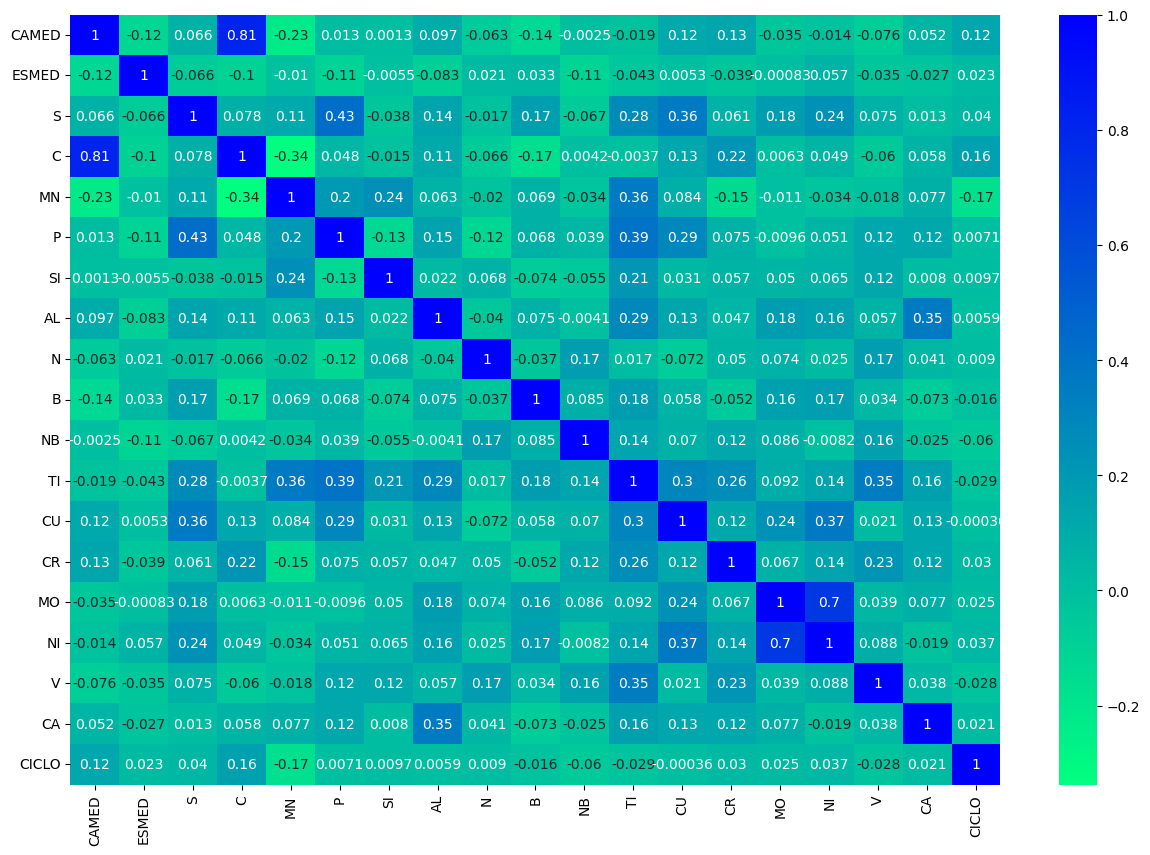

In [48]:
# Mapa de Calor
plt.figure(figsize=(15,10))
sns.heatmap(correlacoes,  cmap='winter_r', annot=True, );

Usando Fator de Inflação de Variância (VIF) < 5; ausência de multicolinearidade

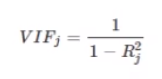

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [50]:
# função espera a presença de uma constante na matriz de variáveis explicativas
vif = add_constant(variaveis)

pd.Series([variance_inflation_factor(vif.values, j) for j in range(vif.shape[1])], index=vif.columns)

const    1605.349575
CAMED       2.969240
ESMED       1.060375
S           1.443042
C           3.334708
MN          1.579284
P           1.549327
SI          1.214605
AL          1.298870
N           1.111630
B           1.162601
NB          1.162843
TI          1.938505
CU          1.434855
CR          1.249858
MO          2.092219
NI          2.327713
V           1.284275
CA          1.242263
CICLO       1.058510
dtype: float64

## **Análise do Modelo**

Intercept

p-valor para cada coeficiente < 0.05 (estatisticamente significativos)

Adjusted R-squared (explicação do modelo através dos dados)

p-valor da estatística F < 0.05 (valida o modelo de regressão)

In [51]:
print(modelo1.summary())

                            OLS Regression Results                            
Dep. Variable:                  LRMED   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     571.9
Date:                Sun, 25 Feb 2024   Prob (F-statistic):               0.00
Time:                        20:14:12   Log-Likelihood:                -8122.0
No. Observations:                1829   AIC:                         1.628e+04
Df Residuals:                    1809   BIC:                         1.639e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    314.4616     19.337     16.262      0.0

#### **Análise dos Resultados Encontrados**

In [60]:
# Variáveis SEM INFLUÊNCIA ESTATÍSTICA no Modelo: (p > |t|) > 0.05
# S, P, N, B, CU, MO, NI, CA, CICLO

modelo2 = smf.ols( 'LRMED ~ CAMED + C + MN + SI + AL + NB + TI + CR + V', data = dados).fit()
print(modelo2.summary())

                            OLS Regression Results                            
Dep. Variable:                  LRMED   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     1199.
Date:                Sun, 25 Feb 2024   Prob (F-statistic):               0.00
Time:                        20:27:32   Log-Likelihood:                -8131.7
No. Observations:                1829   AIC:                         1.628e+04
Df Residuals:                    1819   BIC:                         1.634e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    344.1797     14.906     23.090      0.0

# **Regressão Linear**

### **Definição do Modelo**

In [85]:
# Definindo as variáveis independentes do modelo
Xfeatures = ['CAMED',  'C', 'MN', 'SI', 'AL', 'NB', 'TI', 'CR', 'V']

# Variável dependente - Target
y = ['LRMED']

# Criando o modelo de regressão
regressao = LinearRegression()

# Separando a base de dados em treinamento e teste
treino, teste = train_test_split(dados, test_size=0.30, random_state=0)

dados_treino = pd.DataFrame(treino, columns=dados.columns)
dados_teste  = pd.DataFrame(teste, columns=dados.columns)

Xtreino = dados_treino[ Xfeatures ]
ytreino = dados_treino[ y ]

Xteste  = dados_teste[ Xfeatures ]
yteste  = dados_teste[ y ]

# Efetuando o treinamento do modelo - base de Treino
regressao.fit(Xtreino, ytreino)

# Efetuando predições - base de teste
LR_modelo = regressao.predict(Xteste)

In [86]:
# Obtendo o Intercepto do modelo - Coeficiente Linear
intercept = regressao.intercept_

In [87]:
# Obtendo os Coeficientes para cada Variável - Coeficiente Angular
coef = regressao.coef_

### **Métricas de Avaliação**

In [88]:
# R-squared
print('R-squared: {:.2f}%'.format(regressao.score(Xteste, yteste) * 100))

# Mean-Squared-Error
print('Mean Squared Error: {:.2f}mm'.format(mean_squared_error(yteste, LR_modelo) / 100))

# Mean-Squared-Error
print('Mean Absolute Error: {:.2f}mm'.format(mean_absolute_error(yteste, LR_modelo) / 100))

R-squared: 86.85%
Mean Squared Error: 3.99mm
Mean Absolute Error: 0.15mm


## **Equação da Reta**

In [99]:
print('LR (previsto) = {:.5} + ({:.5} * {}) + ({:.5} * {}) + ({:.5} * {}) + ({:.5} * {}) + ({:.5} * {}) + ({:.5} * {}) + ({:.5} * {}) + ({:.5} * {})'.format(intercept[0],
                                                                                                                                                      coef[0][0],  Xtreino.columns[0],
                                                                                                                                                      coef[0][1],  Xtreino.columns[1],
                                                                                                                                                      coef[0][2],  Xtreino.columns[2],
                                                                                                                                                      coef[0][3],  Xtreino.columns[3],
                                                                                                                                                      coef[0][4],  Xtreino.columns[4],
                                                                                                                                                      coef[0][5],  Xtreino.columns[5],
                                                                                                                                                      coef[0][6],  Xtreino.columns[6],
                                                                                                                                                      coef[0][7],  Xtreino.columns[7],))

LR (previsto) = 369.8 + (0.059586 * CAMED) + (750.85 * C) + (40.935 * MN) + (-211.3 * SI) + (7249.5 * AL) + (4958.8 * NB) + (2.5092e+04 * TI) + (-84.949 * CR)


In [100]:
dados_teste['LR_MODELO'] = LR_modelo
dados_teste.head()

,CORRIDA,ACO,BITOLA,LRMIN,LRMED,LRMAX,ESMIN,ESMED,ESMAX,CAMIN,...,CU,CR,MO,NI,V,CA,TREM,BLOCO,CICLO,LR_MODELO
12205,K337900,1070,5.5,1031,1031,1031,4229.0,4326.0,4454.0,2520,...,0.0092,0.0232,0.0015,0.0084,0.0025,0.0004,TL3,A,20.0,1040.661373
9584,K245802,1084,5.5,1123,1123,1123,4023.0,4112.0,4218.0,2700,...,0.0073,0.0186,0.0024,0.0060,0.0026,0.0004,TL3,A,20.0,1144.522494
1502,J971100,1084,5.5,1164,1164,1164,4169.0,4169.0,4169.0,2820,...,0.0146,0.2604,0.0017,0.0101,0.0033,0.0004,TL3,B,20.0,1135.056626
3291,K048901,1070,5.5,1032,1056,1080,4081.0,4159.0,4258.0,2486,...,0.0084,0.0326,0.0003,0.0063,0.0026,0.0003,TL2,B,12.0,1066.041692
29723,L026102,BC68,5.5,996,1013,1038,3831.0,3975.0,4294.0,2408,...,0.0077,0.0190,0.0026,0.0086,0.0032,0.0004,TL3,B,20.0,1024.288734


Text(0, 0.5, 'LR')

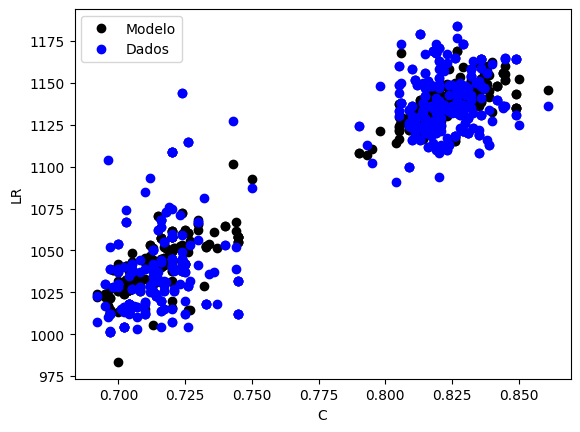

In [104]:
plt.plot(dados_teste['C'], dados_teste['LR_MODELO'], 'ko', label = 'Modelo')
plt.plot(dados_teste['C'], dados_teste['LRMED'], 'bo', label = 'Dados')

# Usando a previsão para um Valor de X
# plt.plot(X, regressao.predict(74), 'bo', label = 'data')

plt.legend()
plt.xlabel('C')
plt.ylabel('LR')
